<a href="https://colab.research.google.com/github/singh-prishita/MLFinalAssignment/blob/main/Sentiment_Analysis_AirbnbDublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="whitegrid")


import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en.examples import sentences

import pickle 

from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

from PIL import Image

from wordcloud import WordCloud, STOPWORDS


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
# Upload data

df_reviews_sample = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/df_reviews_sample.pkl')

In [5]:
df_reviews_sample.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments,length_comments,language,en_translation
94686,15297080,242190922,2018-03-11,105728175,Simone,maire ist eine tolle gastgeberin und lässt ein...,112,de,"maire is a great hostess and with her open, fr..."
126785,19314495,207927530,2017-10-30,141719176,Sumita,die wohnung war sehr schön alles neu und saube...,78,de,the apartment was very nice everything new and...
120227,18791251,272289261,2018-06-03,188002403,Oliver,top unterkunft nette gastgeberin zu zu empfeh...,19,de,top accommodation nice hostess to recommend so...
167683,25539436,507951908,2019-08-12,190123049,Leonie,eine freundin und ich waren über ein wochenend...,36,de,a friend and i stayed in richard's accommodati...
31877,5300081,153643607,2017-05-21,113772667,Benita,ein sehr kleines zimmer ca qm in einer scheinb...,44,de,a very small room about square meters in a see...


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_reviews_sample.shape

(23487, 9)

In [8]:
# Create a unique column with all comments in English

df_reviews_sample['en_translation'].fillna(df_reviews_sample['comments'], inplace=True)
df_reviews_sample = df_reviews_sample.rename(columns={'en_translation': 'comments_english'})

In [9]:
# Create a SentimentIntensityAnalyzer object

analyzer = SentimentIntensityAnalyzer()

In [10]:
# polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary
# which contains pos, neg, neu, and compound scores.
# We will keep the compound score.

polarity_compound = lambda s: (analyzer.polarity_scores(s))['compound']

In [11]:
# Add a new column with the polarity_compound score to the dataframe

df_reviews_sample['polarity_compound'] = df_reviews_sample['comments_english'].map(polarity_compound)

In [13]:
# define a function that classifies polarity score as positive, neutral and negative

def sentiment(x):
    ''' Function that given a Polarity Score
    classifies it as positive, neutral and negative
    '''
    if x >= 0.5:
        return 'pos'
    if x < 0.5 and x > -0.5:
        return 'neu'
    if x < -0.5:
        return 'neg'
    return ''

In [14]:
# Add a new column with sentiment

df_reviews_sample['sentiment'] = df_reviews_sample['polarity_compound'].apply(sentiment)

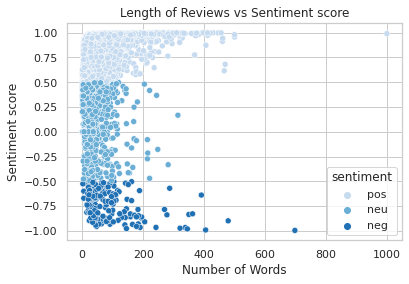

In [15]:
ax = sns.scatterplot(data=df_reviews_sample, 
                     y='polarity_compound', 
                     x='length_comments', 
                     hue='sentiment', 
                     palette = 'Blues')

ax.set(xlabel='Number of Words', ylabel='Sentiment score', title = 'Length of Reviews vs Sentiment score' )

plt.show()

In [16]:
ax.figure.savefig('length_reviews_polarity.png',dpi=600)

In [17]:
df_reviews_sample.to_pickle('/content/drive/MyDrive/Colab Notebooks/df_reviews_sample_sentiment.pkl')

In [18]:
df_reviews_sample_sentiment = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/df_reviews_sample_sentiment.pkl')

In [19]:
# Upload Listings data cleaned

df_clean_listings = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/df_clean_listings.pkl')

In [20]:
df_clean_listings.head()

,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,...,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Dn Laoghaire-Rathdown,neighbourhood_cleansed_Dublin City,neighbourhood_cleansed_Fingal,neighbourhood_cleansed_South Dublin,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,44077,100.0,99.0,2,2,53.29178,-6.25792,2,1.0,2.0,...,0,1,1,0,0,0,0,0,1,0
1,85156,100.0,99.0,2,2,53.29209,-6.25624,2,1.0,1.0,...,0,1,1,0,0,0,0,0,1,0
2,159889,100.0,95.0,3,4,53.39027,-6.23547,1,1.0,1.0,...,0,1,0,1,0,0,0,0,1,0
3,162809,92.0,87.0,2,2,53.28326,-6.19188,6,2.0,4.0,...,0,1,1,0,0,0,0,0,1,0
4,165828,100.0,91.0,5,5,53.33744,-6.32363,5,1.0,3.0,...,0,1,0,1,0,0,1,0,0,0


In [21]:
# Select useful columns for the analysis 

selection_listings = df_clean_listings[['id', 
                                        'number_of_reviews', 
                                        'review_scores_rating', 
                                        'review_scores_accuracy', 
                                        'review_scores_cleanliness', 
                                        'review_scores_checkin', 
                                        'review_scores_communication', 
                                        'review_scores_location', 
                                        'review_scores_value',
                                        'price_per_person',
                                        'price',
                                        'number_of_reviews_ltm',
                                        'number_of_reviews_l30d'
                                        ]]

In [22]:
# Compute the average polarity per listing

listing_polarity = pd.DataFrame(df_reviews_sample_sentiment.groupby(['listing_id']).mean()['polarity_compound'])

In [23]:
# Merge average polarity with listing ratings

df_ratings_polarity = pd.merge(selection_listings, listing_polarity, left_on='id', right_on='listing_id', how='left')

In [24]:
print(f'Missing polarity score for {df_ratings_polarity.polarity_compound.isnull().sum()} listings')

Missing polarity score for 3668 listings


In [25]:
review_scores_price = ['review_scores_rating', 
                'review_scores_accuracy', 
                'review_scores_cleanliness', 
                'review_scores_checkin', 
                'review_scores_communication', 
                'review_scores_location', 
                'review_scores_value',
                'polarity_compound',
                'price_per_person',
                'price',
                'number_of_reviews',
                'number_of_reviews_ltm',
                'number_of_reviews_l30d'
                ]

In [26]:
df_ratings_polarity[review_scores_price].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,polarity_compound,price_per_person,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
count,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,3800.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000
mean,4.603926,4.778072,4.646282,4.828689,4.844336,4.733525,4.615672,0.816233,75.706190,183.061501,32.123460,7.392742,0.957954
std,0.698373,0.356040,0.472587,0.323708,0.304184,0.311377,0.392921,0.182032,1154.094514,1178.155497,65.580718,19.765977,2.050220
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.906100,2.142857,10.000000,0.000000,0.000000,0.000000
25%,4.582991,4.760000,4.615279,4.814793,4.830396,4.680000,4.560000,0.776088,30.000000,65.000000,1.000000,0.000000,0.000000
50%,4.730000,4.840000,4.710000,4.900000,4.910000,4.760000,4.647247,0.866182,42.500000,105.000000,7.000000,0.000000,0.000000
75%,4.940000,5.000000,4.950000,5.000000,5.000000,4.940000,4.840000,0.925285,63.500000,194.000000,30.000000,6.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.997700,99149.000000,99149.000000,770.000000,536.000000,23.000000


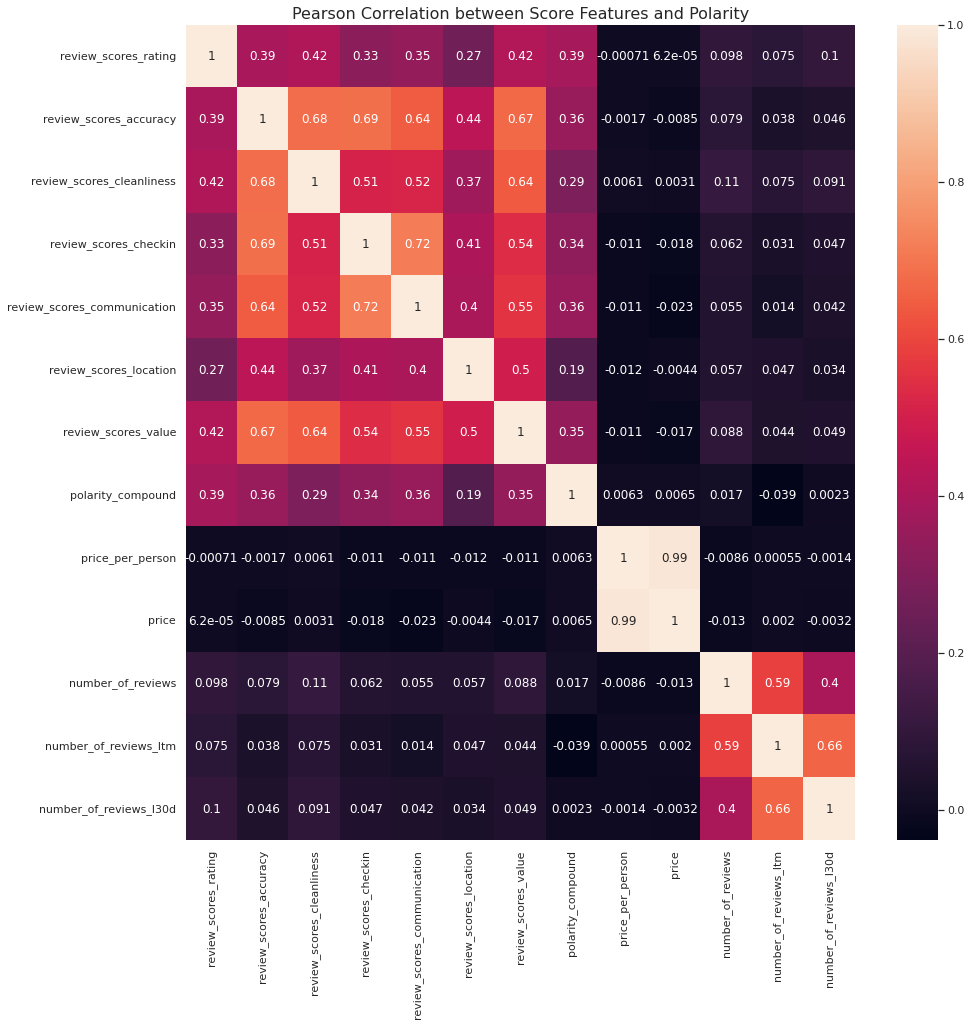

In [27]:
# Exploring correlations

corr = df_ratings_polarity[review_scores_price].corr()

plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, annot=True)
plt.title('Pearson Correlation between Score Features and Polarity', fontsize=16);
plt.show()

In [28]:
ax.figure.savefig('corr_rating_polarity.png', dpi=600, bbox_inches = "tight")